In [1]:
import pandas as pd
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [164]:
from src.lime_timeseries_optimized import *
from keras.engine.saving import load_model
import time
from matplotlib import pyplot as plt
import matplotlib

In [102]:
# select a set of background examples to take an expectation over
training_set = np.load('/home/justyna/WORKSPACE/heartbeat_classification/data/processed/preprocessed/physionet/serialized/no_feature_extraction/train.npy')
x_test = np.load('/home/justyna/WORKSPACE/heartbeat_classification/data/processed/preprocessed/physionet/serialized/no_feature_extraction/test.npy')
MODEL = load_model('/home/justyna/WORKSPACE/heartbeat_classification/src/flask-app/convo_weights.h5')
training_labels = np.load('/home/justyna/WORKSPACE/heartbeat_classification/data/processed/preprocessed/physionet/serialized/no_feature_extraction/train_labels.npy')

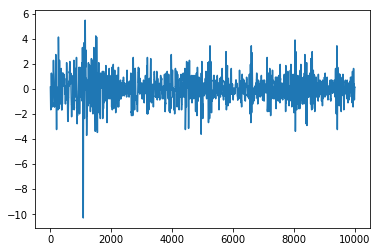

In [6]:
instance = training_set[0]
label = training_labels[0]
plt.plot(instance)

In [7]:
def predict(instances):
    labels = []
    for instance in instances:
        instance = np.reshape(instance, newshape=(1, instance.shape[0], 1))
        labels.append(MODEL.predict(instance))
    return np.array(labels).reshape(len(instances), 2)

In [147]:
num_samples = 100
num_slices = 50
num_features = 20

In [127]:
def explain():
    now = time.time()
    explanations = explainer.explain_instance(timeseries=instance,num_features=num_features, training_set=training_set, num_samples=num_samples,num_slices=num_slices, classifier_fn=predict)
    end = time.time()
    execution_time = end - now
    return explanations, execution_time

In [139]:
explainer = LimeTimeSeriesExplanation(feature_selection='auto', verbose=False)

In [148]:
explanations, execution_time = explain()

Explaining


In [149]:
execution_time

9.375142574310303

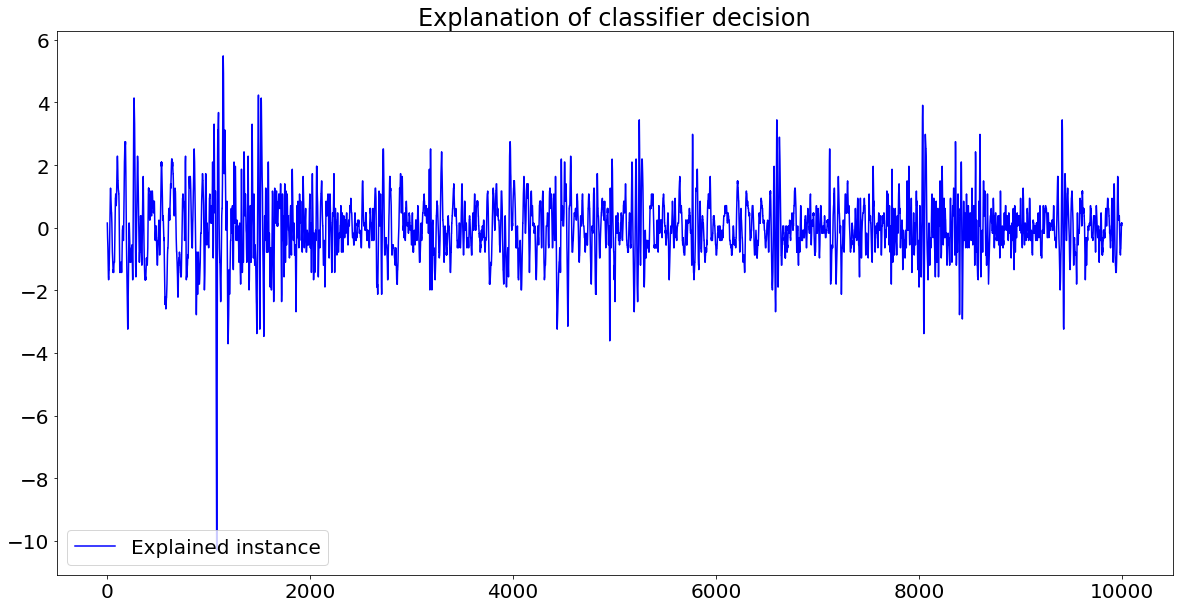

In [166]:
matplotlib.rcParams.update({'font.size': 20})
values_per_slice = math.ceil(len(instance) / num_slices)
plt.figure(figsize=(20,10))
plt.plot(instance, color='b', label='Explained instance')
plt.title("Explanation of classifier decision")
plt.legend(loc='lower left')
exp = explanations[0][1]
for i in range(10):
    feature, weight = exp[i]
    start = feature * values_per_slice
    end = start + values_per_slice
    plt.axvspan(start , end, color='red', alpha=(abs(weight*(10**2))))

-6.167533292019525e-25
-6.167533292019358e-25
3.765772319857175e-29
1.0537394334695137e-31
1.0537390379092896e-31
-2.050260764948229e-32
4.261128332989228e-33
4.2611274068476254e-33
1.341731645221825e-36
1.341731645221825e-36


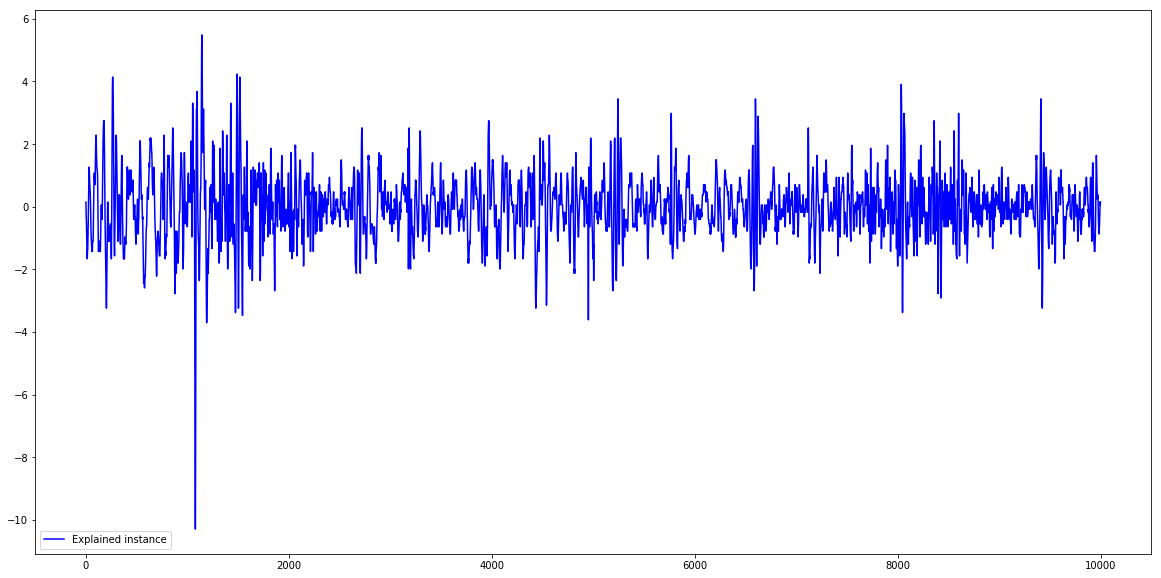

In [144]:
values_per_slice = math.ceil(len(instance) / num_slices)
plt.figure(figsize=(20,10))
plt.plot(instance, color='b', label='Explained instance')
# plt.plot(coffee_test_x.iloc[15:,:].mean(), color='green', label='Mean of other class')
plt.legend(loc='lower left')
exp = explanations[1][1]
for i in range(10):
    feature, weight = exp[i]
    start = feature * values_per_slice
    end = start + values_per_slice
    print(weight)
    plt.axvspan(start , end, color='red', alpha=(abs(weight*(10**20))))

In [15]:
a = np.array([[1,1,1],[0,0,0],[1,2,3]])
np.mean(a)

1.0